# Неделя 1. Вторник

## Статистика и распределения

**1.** В рамках исследования рынка продуктового ассортимента компании, было определено, что у трех товаров имеются следующие ценовые значения: $2, 4$ и $6$ условных единиц. Мы провели анализ и выяснили, что средняя цена товаров составляет $\mathbb{E} \left[ X \right] = 4.2$, а дисперсия цен равна $\mathbb{D} \left[X \right] = 1.96$. Найти вероятности покупки каждого из товаров  

|  случайная величина X   | 2 | 4    | 6   |
|------|---|------|------|
| вероятность p | ? | ? | ? | 

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
4.2 * 4.2 + 1.96

19.6

In [5]:
M = np.array([[2, 4, 6], [4, 16, 36], [1, 1, 1]])
M

y = np.array([4.2, 19.6, 1])

In [6]:
np.linalg.inv(M) @ y

array([0.2, 0.5, 0.3])

In [6]:
np.linalg.solve(M, y)

array([0.2, 0.5, 0.3])

p1 = 0.2, p2 = 0.5, p3 = 0.3

**2.** Контрольная работа состоит из трех вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составить закон распределения числа правильных ответов при простом угадывании. Найти $\mathbb{E}(X)$, $\mathbb{D}(X)$.

$x = y_1 + y_2 + y_3$  
$y_i \sim Be(\dfrac{1}{4})$  
$x \sim Bi(3, \dfrac{1}{4})$

In [10]:
from scipy.stats import binom

n = 3

p = 0.25

binom_distr = binom(n, p)

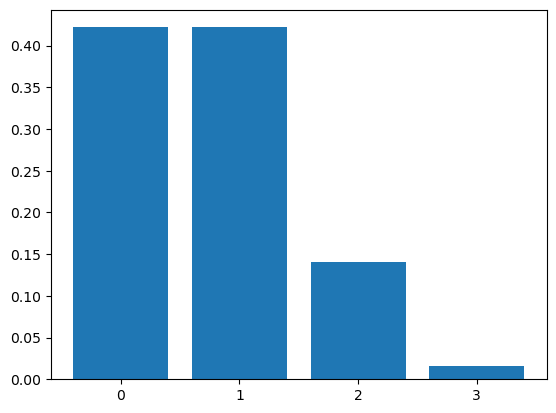

In [11]:
x = np.arange(0, 4, 1)

plt.bar(x, binom_distr.pmf(x))
plt.xticks(np.arange(0, 4, 1))
plt.show()

${P}{x}(k)$ = $\binom{n}{k}$ * $p^k * (1-p)^{(n-k)}$  
E(x) = 0.75  
D(x) = 0.5625

**3.** Дан закон распределения случайной величины: 

|  2   | 5 | 8    | 11   |
|------|---|------|------|
| 0.46 | ? | 0.11 | 0.14 |

* Найди неизвестную вероятность и объясните, почему ответ именно такой. 

0.29

* Визуализируй функцию распределения по полученному в предыдущем пункте результату

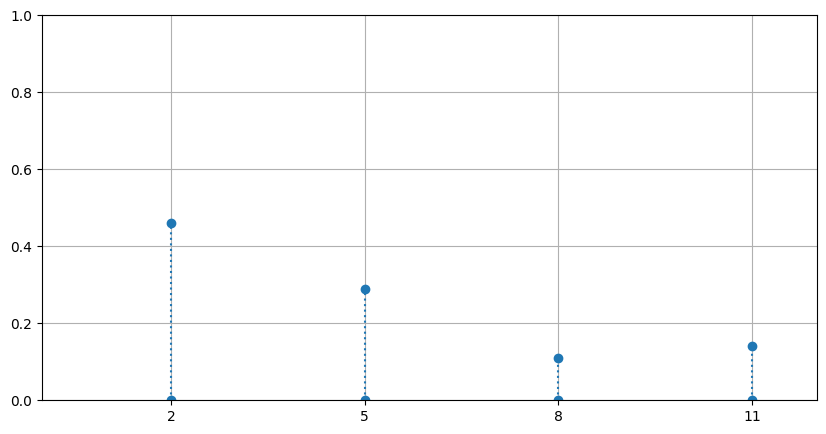

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.xlim(0,12)
plt.grid()
plt.xticks([2,5,8,11])
plt.axvline(x=2, ymin=0, ymax=0.46, linestyle=':', marker='o')
plt.axvline(x=5, ymin=0, ymax=0.29, linestyle=':', marker='o')
plt.axvline(x=8, ymin=0, ymax=0.11, linestyle=':', marker='o')
plt.axvline(x=11, ymin=0, ymax=0.14, linestyle=':', marker='o')
plt.show()

**4.** Мы являемся владельцами розничного магазина и хотим оптимизировать нашу обслуживающую систему, чтобы обеспечить удобство покупателей и эффективность работы магазина. Известно, что в среднем в магазин заходит 3 человека в минуту. Нам бы хотелось оценить все вероятности потока людей, что правильно планировать наши ресурсы

* Что это за распределение?

Пуассона

* Найти вероятность того, что за 2 минуты в магазин зайдет не более 1 человека.

7${*e^{-6}} \approx 0.0174$

In [12]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

lambda_ = 3

pois_distr = poisson(lambda_)

In [13]:
pois_distr.pmf(0) * pois_distr.pmf(0) + pois_distr.pmf(1) * pois_distr.pmf(0) + pois_distr.pmf(0) * pois_distr.pmf(1)

0.017351265236664512

In [14]:
poisson(6).pmf(0) + poisson(6).pmf(1)

0.0173512652366645

In [15]:
poisson(6).cdf(1)

0.01735126523666451

* Визуализируй это распределение с вычисленным параметром с помощью бибилиотеки `scipy`

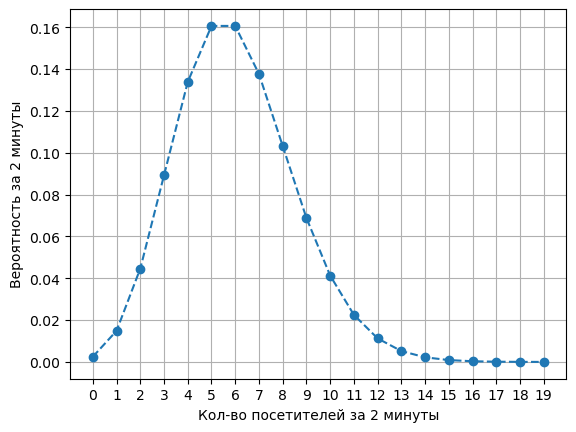

In [17]:
from scipy.stats import poisson
import numpy as np

distr = poisson(6) #  Так как в среднем поток в каждую минуту(=3), то поток за 2 минуты в среднем (=6)
x = np.arange(0,20,1)
y = distr.pmf(x)
plt.plot(x,y, '--o')
plt.xlabel('Кол-во посетителей за 2 минуты')
plt.ylabel('Вероятность за 2 минуты')
plt.xticks(x)
plt.grid()

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "stat tasks in progress"`
4. Выполни команду `git push`

**5.** Нами закуплен новый станок для работы по металлу. Известно, что время работы этого станка до первого отказа подчиняется показательному(экспоненциальному) распределению со средним значением 1 год. Отказ этого станка для нас это огромные убытки. 

* Какова вероятность, что до первого отказа пройдет не менее 2 лет?

${\approx 0.135}$

* Как по-другому называется показательное распределение? 

Экспоненциальное

In [19]:
from scipy.stats import expon
distr = expon(scale=1)

1 - distr.cdf(2)

0.1353352832366127

* Визуализируй это распределение

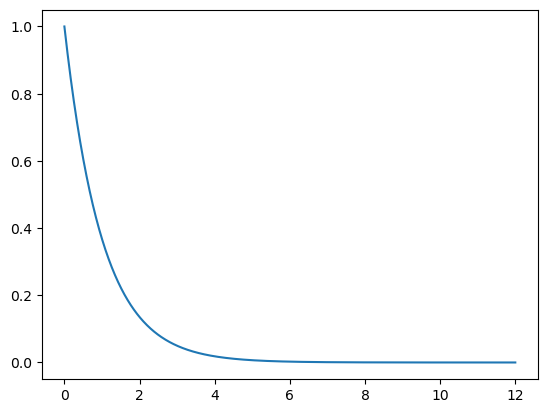

In [20]:
import seaborn as sns
from scipy.stats import expon
distr = expon(scale=1)

x = np.linspace(0, 12, 1000)
y = plt.plot(x, distr.pdf(x))

**6.** С базы в магазин отправлено 4000 тщательно упакованных доброкачественных изделий. Вероятность того, что изделие повредится в пути, равна 0.0005. 

* Что это за распределение?

Биномиальное, но можно приблизить пуассоном ${\xi}$ ~ ${Pois(n*p = 2)}$

In [26]:
poisson(2).pmf(3)

0.18044704431548356

* Найти вероятность того, что из 4000 изделий в магазин прибудут 3 испорченных изделия.

${\approx 0.1804}$

**7.** Рост мальчиков возрастной группы 15 лет - нормально распределённая случайная величина $X$ с параметрами $\mu=161$ см и $\sigma=4$ см.
* Какую долю костюмов для мальчиков, имеющих рост от 152 до 158 см, нужно предусмотреть в объёме производства для данной возрастной группы?

${\approx 0.2144}$

* Сформулируй правило трёх сигм для случайной величины $X\sim\mathcal{N}$.

> ответ тут

* Визуализируй следующие элементы: 
    * кривую плотности вероятности для указанных параметров и распределения
    * залей выдели цветом нужный фрагмет диаграммы (примерно это должно выглядеть [так](https://i.stack.imgur.com/c8F3F.png), только с твоими параметрами)

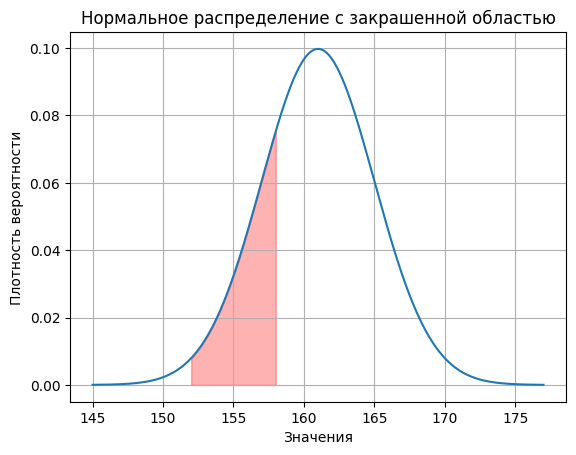

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Задаем параметры распределения
mu = 161
sigma = 4

# Создаем массив значений для построения графика
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

# Строим график нормального распределения
plt.plot(x, y)

# Закрашиваем область
x_fill = np.linspace(152, 158, 1000)
y_fill = stats.norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.3)

# Оформляем график
plt.title('Нормальное распределение с закрашенной областью')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.grid(True)
plt.show()

❓От чего зависит форма кривой нормального распределения? 

От среднего и стандартного отклонения

In [30]:
st.norm(10, 2).cdf(11) # Время обслуживание 1 человека

0.6914624612740131

In [23]:
import scipy.stats as st

In [24]:
mu = 10
sigma = 2
n=20

distr = st.norm(mu, sigma/np.sqrt(20))

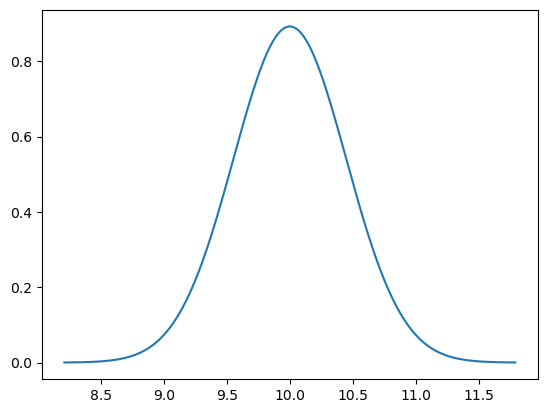

In [27]:
x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), 1000)

plt.plot(x, distr.pdf(x))

In [28]:
distr.cdf(11)

0.9873263406612659

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "stat tasks completed"`
4. Выполни команду `git push`